# Исследование объявлений о продаже квартир

В анализе представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Необходимо определить рыночную стоимость объектов недвижимости. 
Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

### Анализ общей информации данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

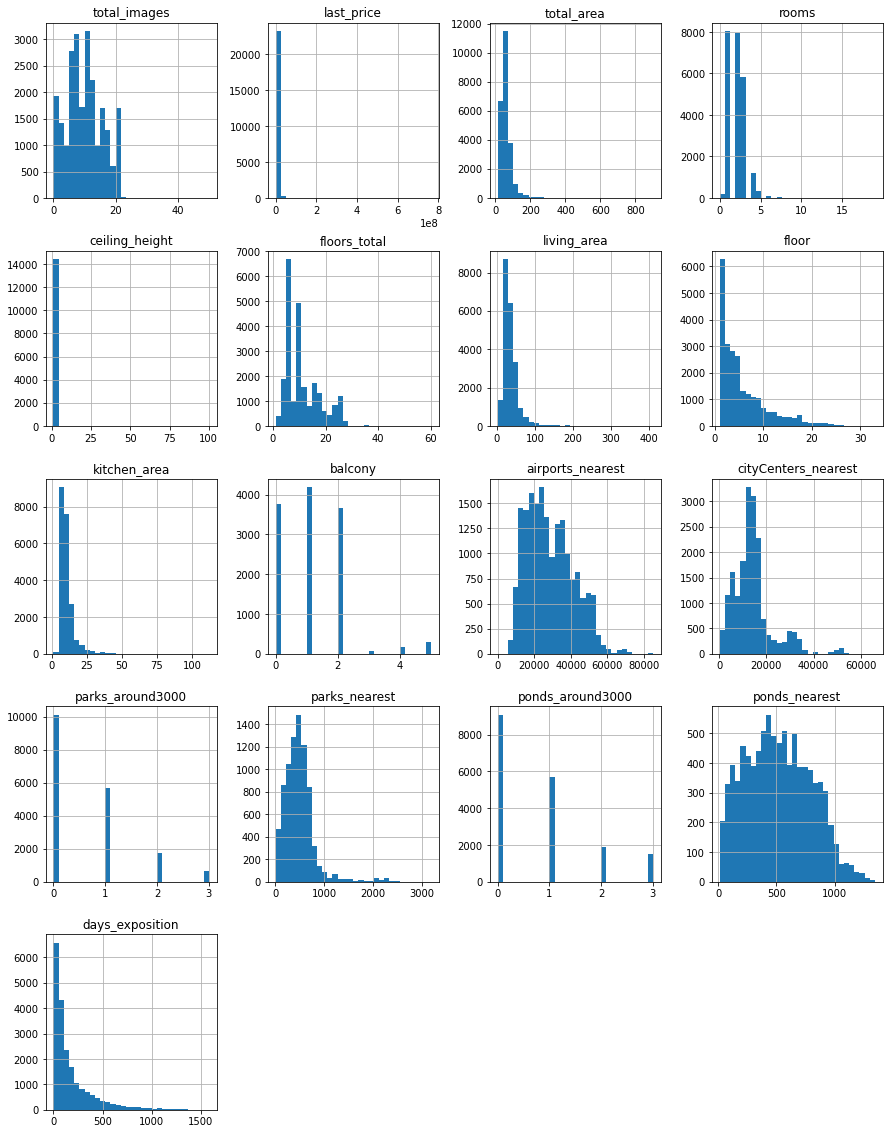

In [4]:
data.hist(bins=30, figsize=(15, 20))
pass

- В столбце 'last_price' распределение неравномерное. По графику видно, что есть несколько аномальных значений, в разы превышающие основной набор данных, из-за чего график нечитаем. Аналогичная ситуация со столбцами 'ceiling_height', 'total_area', 'living_area', 'kitchen_area' и 'rooms'. 
- По обрывистым графикам 'rooms', 'balcony', 'parks_around3000', 'ponds_around3000' видно, что тип данных выбран неверно: вместо float, должен быть integer
- По тому, как сильно отличается график 'cityCenters_nearest' от подобных ему параметров 'parks_nearest', 'ponds_nearest' и 'airports_nearest', можно предположить, что в данных много пропусков, искажающих общее распределение

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения есть в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

#### Столбец 'ceiling_height'

In [6]:
# sorted(data['ceiling_height'].unique()) 

В СП 54.13330.2016 написано:"Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в
климатических подрайонах IA, IБ, IГ, IД и IVА, определяемых по СП 131.13330,
должна быть не менее 2,7 м, а в других климатических подрайонах - не менее
2,5 м." Санкт-Петербург и Лен.область относится к подрайону IIВ, теоретически минимальный порог возьмем 2,5м. Посмотрим, что с максимальным значением.

In [7]:
ceiling_height_to25 = data.query('ceiling_height<2.5')
#print(ceiling_height_to25['ceiling_height'].value_counts().sort_index())
ceiling_height_to4 = data.query('ceiling_height>4')
#print(ceiling_height_to4['ceiling_height'].value_counts().sort_index())

Высота потолков в сталинках обычно до 4 метров. Несмотря на то, что количество строк с вариацией значений высоты потолков до 6 метров мало, оставлю эти значения: гипотетически, такое возможно в старом фонде. Все же самих вариаций достаточно много. Если бы был указан год постройки - было проще понять - являются эти значения истинными или нет. А еще лучше - указана серия дома, если дом был построен в советское время. Оставим также высоты потолков со значениями 25-32 м - выдвину предположение, что высота была ошибочно указана в см, переведу в м. Также оставим значения высоты потолка от 2.4 м, так как значений достаточно много, разница с минимальным по СП 10см - выглядит правдоподобно. Итак, оставляем высоту потолка 2,4-6м

In [8]:
data[data['ceiling_height'] == 25] = data[data['ceiling_height'] == 2.5]
data[data['ceiling_height'] == 26] = data[data['ceiling_height'] == 2.6]
data[data['ceiling_height'] == 27] = data[data['ceiling_height'] == 2.7]
data[data['ceiling_height'] == 27.5] = data[data['ceiling_height'] == 2.75]
data[data['ceiling_height'] == 32] = data[data['ceiling_height'] == 3.2]
#sorted(data['ceiling_height'].unique()) #проверка

In [9]:
ceiling_height = data.query('2.4 <=ceiling_height <= 6.0')
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height['ceiling_height'].median()) #заполню пропуски отсортированными медианными значениями 
data = data.query('2.4 <=ceiling_height <= 6.0') #удалю строки с аномальными значениями
#sorted(data['ceiling_height'].unique()) #проверка
#data['ceiling_height'].isna().sum() #проверяю остались ли пропуски

#### Столбец 'floors_total'

In [10]:
data['floors_total'].value_counts().sort_index().head(15)

1.0       24
2.0      378
3.0      667
4.0     1199
5.0     5767
6.0      913
7.0      592
8.0      390
9.0     3757
10.0    1173
11.0     203
12.0    1360
13.0     229
14.0     551
15.0     364
Name: floors_total, dtype: int64

In [11]:
# data.query('floors_total >= 28')

Самый высокий жилой дом в Санкт-Петербурге действительно имеет 36 этажей. 60 этажей есть разве что в Лахта-центре, но жилых квартир там нет. В Парголово и Мурино есть жилые дома с 29 этажей. Снова жаль, что нет указаний насчет года постройки, было бы проще определить реальные ли это цифры или нет. Удалю строки с 52 и 60 этажами. Пропуски заполнять не буду, не понятно, по какому критерию их нужно заполнять. 

In [12]:
data = data.query('floors_total != 52 & floors_total != 60') #удалю строки с аномальными значениями
#sorted(data['floors_total'].unique()) #проверка

Так как нет качественных вариантов заполнения пропусков, удалю строки с пропущенными значениями

In [13]:
data = data.dropna(subset=['floors_total'])
#sorted(data['floors_total'].unique()) #проверка

In [14]:
data['floors_total'] = data['floors_total'].astype(int) #меняю тип данных на целочисленный
#data.info() #проверка

#### Столбец 'living_area'

In [15]:
data['living_area'].value_counts().head()

18.0    881
17.0    672
30.0    595
16.0    484
20.0    479
Name: living_area, dtype: int64

Большинство квартир - это студии c жилой площадью 18м2. Посмотрю, какую же минимальную площадь можно взять для сортировки.

In [16]:
# print(data.query('living_area <= 13')['living_area'].value_counts().sort_index(ascending=False))
# data.query('living_area >= 10 & living_area <= 18')['living_area'].hist()

Строк с минимальнымы значениями 10, 11, 12 и 13 кв.м. достаточно много, возьму минимум 10 кв.м.

In [17]:
#data.query('living_area >= 200')#['living_area'].value_counts()

Сложно определить аномалии в квартирах с жилой площадью более 200кв.м. - у них у всех достаточно много комнат и высокие потолки. Для начала я удалю явно аномальные строки с жилой площадью меньше 10кв.м. и в квартирах до 18кв.м должно быть указано, что это студия, а затем заполню пропуски медианными значениями в зависимости от общей площади квартиры.

In [18]:
data = data.query('living_area >= 10 & ~(living_area <= 18 & studio == True)')
data['living_area'] = data['living_area'].fillna(data.groupby(['total_area'])['living_area'].transform('median'))
#data['living_area'].hist() #проверка
data['living_area'].isna().sum() #проверяю остались ли пропуски

0

#### Столбец 'is_apartment'

In [19]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Столбец 'is_apartment' должен быть заполнен булевыми значениями и все же там есть пропуски. Предположу, что пропуски означают, что квартира не является апартаментами. Таким образов изменю и тип данных на bool

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)
#data['is_apartment'].unique() #проверка
#data.info() #проверка

#### Столбец 'kitchen_area'

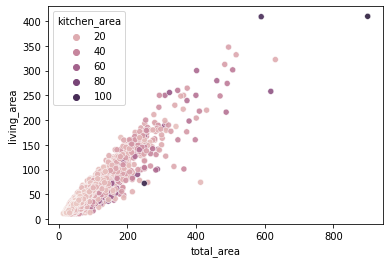

In [21]:
sns.scatterplot(data=data, x='total_area', y='living_area',hue='kitchen_area',  alpha=0.9);

По диаграмме рассеивания, видно, что значения столбцов 'total_area', 'living_area', 'kitchen_area' имеют логичную корреляцию, следовательно, аномальных значений быть не должно. Свяжу пропуски в столбце 'kitchen_area' с медианными значениями по столбцам 'living_area' и 'total_area', и таким образом заполню пустые строки.

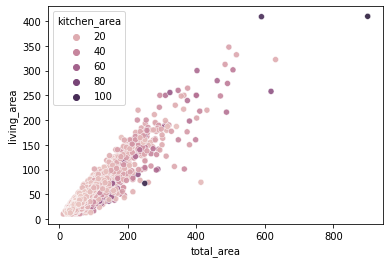

In [22]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['total_area','living_area'])['kitchen_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['living_area'])['kitchen_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].isna().sum()

#sorted(data['kitchen_area'].unique())
#sns.displot(data=data, x='kitchen_area', kde=True);
sns.scatterplot(data=data, x='total_area', y='living_area',hue='kitchen_area', alpha=0.9);
#data[data['kitchen_area'].isnull()]

#### Столбец 'balcony'

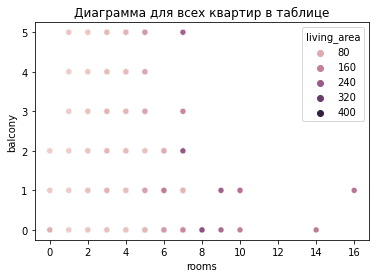

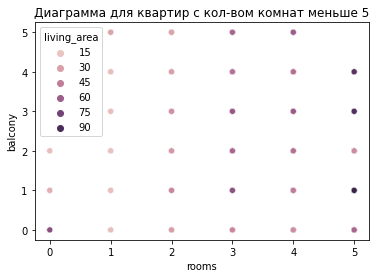

In [23]:
#plt.subplot(1, 2, 1)

sns.scatterplot(data=data, x='rooms', y='balcony',hue='living_area');
plt.title('Диаграмма для всех квартир в таблице');
plt.show()
#plt.subplot(1, 2, 2)
balcony = data.query('rooms <= 5 & living_area < 100')
sns.scatterplot(data=balcony, x='rooms', y='balcony',hue='living_area', alpha=1);
plt.title('Диаграмма для квартир с кол-вом комнат меньше 5');

В столбце 'balcony' присутствует аномалия: в квартирах с небольшой площадью количество балконов превышает количество комнат. Аномалию не представляется возможным исправить качественно, приму в расчет, что данный столбец не будет участвовать в конечном анализе. 

In [24]:
data.balcony.unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Предположу, что пропуски из-за отсутствия в квартире балконов и заполню нулями. Переведу столбец в int.

In [25]:
data['balcony'] = data['balcony'].fillna(0)
#data.balcony.unique() проверка
data['balcony'] = data['balcony'].astype(int)
#data.info() проверка

#### Столбец locality_name

In [26]:
# для начала исправлю имя столбца
data.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace = True)
#data.columns #проверка

In [27]:
print(data['locality_name'].isna().sum())
data.query("locality_name == 'Санкт-Петербург'")['citycenters_nearest'].max() #29493
data.query('citycenters_nearest < 29493')['locality_name'].fillna('Санкт-Петербург')
print(data['locality_name'].isna().sum())

43
43


В пропущенных строках столбца 'locality_name' нет Санкт-Петербурга, следовательно, все квартиры с пропусками в этом столбце находятся в Лен.области. 
Удалю неявные дубликаты в названиях населенных пунктов. Заполню пропуски общим названием "Лен.область"

In [28]:
print(len(data['locality_name'].unique()))
data['locality_name'] =  data['locality_name'].str.replace('ё', 'е')
list = ["поселок ","поселок городского типа ","городской поселок ",'садовое товарищество ','село ','городской ','городского типа ','коттеджный ','станции ','имени ','деревня ','при железнодорожной ','садоводческое некоммерческое товарищество ','Пансионат ']
for i in list:
    data['locality_name'] =  data['locality_name'].str.replace(i, '')
#print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))
data['locality_name'] = data['locality_name'].fillna('Лен.область')
#print(data['locality_name'].isna().sum()) проверка

348
289


#### Столбцы days_exposition и 'first_day_exposition'

Предположу, что пропуски в столбце days_exposition (сколько дней было размещено объявление (от публикации до снятия)) есть по причине того, что на момент выгрузки данных объявления были еще не сняты. Заменю пропущенные значения разницей между максимальным значением first_day_exposition и значением first_day_exposition.

Переведу столбец 'first_day_exposition' в формат datetime

Переведу столбец 'days_exposition' в формат int

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

#data.info() проверка
for row in data:
    data['days_exposition'] = data['days_exposition'].fillna(data['first_day_exposition'].max()-data['first_day_exposition'])
data['days_exposition'] = data['days_exposition'].astype(str)    
list = [' days 00:00:00']
for i in list:
    data['days_exposition'] =  data['days_exposition'].str.replace(i, '')

data['days_exposition'] = data['days_exposition'].astype(float) 
data['days_exposition'] = data['days_exposition'].astype(int) 

In [30]:
#data.info() #проверка

#### Столбец floor  

Переведу значения столбца в int, так как этаж является целочисленным значением

In [31]:
data.query('floor > floors_total') #аномалии не найдены
data['floor'] = data['floor'].astype(int) 
#data.info() #проверка

#### Столбец open_plan 

Переведу значения столбца в bool, так как столбец open_plan заполнен булевыми значениями

In [32]:
data['open_plan'].unique()
data['open_plan'] = data['open_plan'].astype(bool)
#data.info() #проверка
data.query('open_plan == True & rooms > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1379,3.0,6000000.0,44.2,2015-11-10,1.0,2.65,25,17.4,23,False,False,True,8.3,1,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,231
5668,9.0,3550000.0,36.7,2016-04-25,1.0,2.75,16,17.8,2,False,False,True,8.3,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,61
8861,13.0,5500000.0,64.5,2015-11-13,3.0,3.00,5,48.0,2,False,False,True,7.0,0,Санкт-Петербург,20040.0,2621.0,2.0,205.0,2.0,204.0,229
9063,6.0,3800000.0,39.0,2016-05-19,1.0,2.65,17,30.0,1,False,False,True,8.0,0,Санкт-Петербург,36721.0,13635.0,0.0,NaN,0.0,NaN,45
12760,0.0,3350000.0,51.0,2015-01-22,2.0,2.50,12,30.0,10,False,False,True,8.7,2,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,521
14017,13.0,3990000.0,59.0,2016-03-29,3.0,2.50,9,37.6,3,False,False,True,9.9,1,Колпино,27820.0,33606.0,0.0,NaN,1.0,705.0,81
19796,1.0,12000000.0,97.2,2016-04-05,4.0,3.35,5,71.3,2,False,False,True,13.2,0,Санкт-Петербург,24559.0,4811.0,0.0,NaN,0.0,NaN,89


Квартира со свободной планировкой — та, в которой нет внутренних стен, а количество несущих опор сведено к минимуму.
Следовательно, количество комнат должно быть равно 0. Заменю значения на False в строках с большим количеством комнат. 

In [33]:
data.loc[data['rooms'] > 0, 'open_plan'] = False
#data.query('open_plan == True & rooms > 0') проверка

#### Столбец studio 

Изменю тип данных столбца на bool, так как по факту значения имеют булевый тип

Определение аномалий в стобце считаю невозможным, так как единственный очевидный столбец для проверки 'rooms' без достаточного описания: общее ли количество комнат указывается в квартире или только жилые. 

In [34]:
data['studio'].unique()
data['studio'] = data['studio'].astype(bool)
#data.info() #проверка

#### Столбец rooms 

Переведу значения столбца в int, так как количество комнат является целочисленным значением

In [35]:
data['rooms'].unique()
data['rooms'] = data['rooms'].astype(int)
#data.info() #проверка

#### Столбцы  'airports_nearest', 'citycenters_nearest', 'parks_around3000', 'ponds_around3000' и 'ponds_nearest', 'parks_nearest'

Не представляется возможным заполнить качественно пропуски в данных столбцах. 
Нет связи между столбцами 'airports_nearest','citycenters_nearest' с тем, является ли местоположение квартиры в Санкт-Петербурге.
Заменю тип данных в столбцах 'ponds_around3000' и  'parks_around3000' на целочисленный (int), пропуски в данных заполню нулями

In [36]:
#data.query('locality_name == "Санкт-Петербург"')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)

#data.info() #проверка

#### Столбец  'total_images'

Переведу значения столбца в int, так как число фотографий квартиры в объявлении - целочисленное значение

In [37]:
data['total_images'].unique()
data['total_images'] = data['total_images'].astype(int)
#data.info() #проверка

#### Столбец  'last_price'

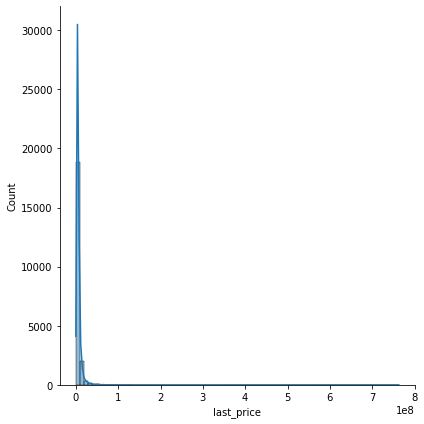

In [38]:
sns.displot(data=data, x='last_price', bins=80, height= 6, kde=True);

In [39]:
data.query('last_price>50000000')['last_price'].count()

114

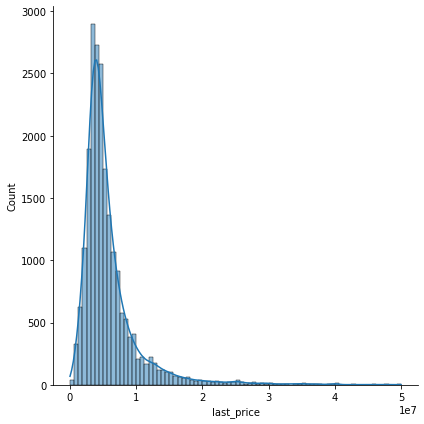

In [40]:
sns.displot(data=data.query('last_price<50000000'), x='last_price', bins=80, height= 6, kde=True);

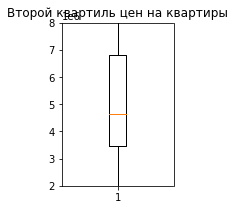

In [41]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['last_price'])
plt.ylim(2000000, 8000000)
plt.title('Второй квартиль цен на квартиры');
pass

12190.0


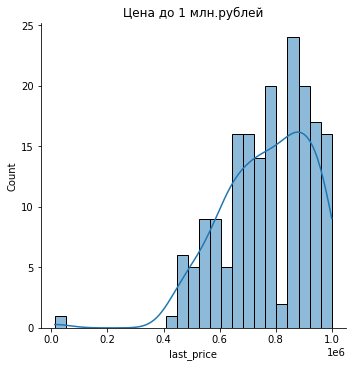

In [42]:
price = data.query('last_price<1000000')
sns.displot(data=price, x='last_price', bins=25, height= 5, kde=True)
plt.title('Цена до 1 млн.рублей');
print(data['last_price'].min())
data = data.query('last_price>12190')
data = data.query('last_price<50000000')

По графику видно, что в столбце 'last_price' есть явно выбивающая аномальная цена 12190тыс.руб., удалю строку. И оставлю только квартиры с ценой до 50млн.рублей: квартиры выше данного ценнового сегмента слишком сильно влияют на графики, их мало и они не являются типичными.

#### Вывод 

Были проанализированны пропущенные значения в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

- В столбце ceiling_height были удалены аномальные низкие высоты потолков, пропущенные значения заполнены медианными значениями столбца. 
- В столбце floors_total удалены строки с пропущенными значениями
- В столбце living_area удалены аномальные строки с малой жилой площадью меньше 10кв.м. заполнены пропуски медианными значениями в зависимости от общей площади квартиры.
- Столбец 'is_apartment' должен быть заполнен булевыми значениями. Пропуски заполнены False. Изменен тип данных на bool
- В столбце 'kitchen_area' пропуски заполнены медианными значениями по столбцам 'living_area' и 'total_area', так как имеют логичную корреляцию. 
- В столбце 'balcony' присутствует аномалия: в квартирах с небольшой площадью количество балконов превышает количество комнат. Аномалию не представилось возможным исправить качественно, данный столбец не будет участвовать в конечном анализе.
- В столбце 'locality_name' удалены неявные дубликаты в названиях населенных пунктов. Заполнены пропуски общим названием "Лен.область"
- Было выдвинуто предположение, что в  столбце days_exposition (сколько дней было размещено объявление (от публикации до снятия)) есть пропуски по причине того, что на момент выгрузки данных объявления были еще не сняты. Заменены пропущенные значения разницей между максимальным значением first_day_exposition и значением first_day_exposition. Переведен столбец 'days_exposition' в формат int.
- Столбец 'first_day_exposition' переведен в формат datetime. 
- В столбце 'floor ' значения переведены в int, так как этаж является целочисленным значением
- В столбце 'open_plan' значения переведены в bool. Заменены аномальные значения на False в строках с количеством комнат больше 1.
- В столбце 'studio' изменен тип данных на bool, так как по факту значения имеют булевый тип.
- В столбце 'rooms' переведены значения в int, так как количество комнат является целочисленным значением
- В столбцах 'airports_nearest', 'citycenters_nearest', 'parks_around3000', 'ponds_around3000' и 'ponds_nearest', 'parks_nearest' не представляется возможным заполнить качественно пропуски. Заменены тип данных в столбцах 'ponds_around3000' и 'parks_around3000' на целочисленный (int), пропуски в данных заполнены нулями.
- В столбце 'total_images' переведены значения в int, так как число фотографий квартиры в объявлении - целочисленное значение.
- В столбце 'last_price' удалены аномальные значения и оставлены только квартиры с ценой до 50млн.рублей: квартиры выше данного ценнового сегмента слишком сильно влияют на графики, их мало и они не являются типичными.

### Вычисление и добавление в таблицу новых столбцов

#### Столбец price_per_sqm, цена одного квадратного метра

In [43]:
data['price_per_sqm'] = (data['last_price']/1000)/data['total_area']
#data.info() #проверка

#### Столбец weekday, день недели публикации объявления 

In [45]:
data['weekday'] = data['first_day_exposition'].dt.weekday
#data.info() #проверка
#data[['weekday', 'first_day_exposition']].head() #проверка

#### Столбец month, месяц публикации объявления 

In [46]:
data['month'] = data['first_day_exposition'].dt.month
#data.info() #проверка
#data[['month', 'first_day_exposition']].head() #проверка

#### Столбец year, год публикации объявления 

In [47]:
data['year'] = data['first_day_exposition'].dt.year
#data.info() #проверка
#data[['year', 'first_day_exposition']].head() #проверка

#### Столбец floor_category, тип этажа квартиры (значения — «первый», «последний», «другой»)

In [48]:
data['floor_category'] = 'другой'
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
#data.info() #проверка
#data[['floor', 'floors_total', 'floor_category']].head(20) #проверка

#### Столбец citycenter_km, расстояние в км до центра города

In [49]:
def km(distance):
    try:
        return round(distance/1000)
    except:
        pass

In [50]:
data['citycenter_km'] = data['citycenters_nearest'].apply(km)

#data.info() #проверка
#data[['citycenter_km']].head(20) #проверка

#### Вывод

- Добавлен столбец price_per_sqm, цена одного квадратного метра
- Добавлен столбец weekday, день недели публикации объявления
- Добавлен столбец month, месяц публикации объявления
- Добавлен столбец year, год публикации объявления
- Добавлен столбец floor_category, тип этажа квартиры (значения — «первый», «последний», «другой»)
- Добавлен столбец citycenter_km, расстояние в км до центра города

### Исследовательский анализ данных

#### Столбцы total_area, living_area, kitchen area

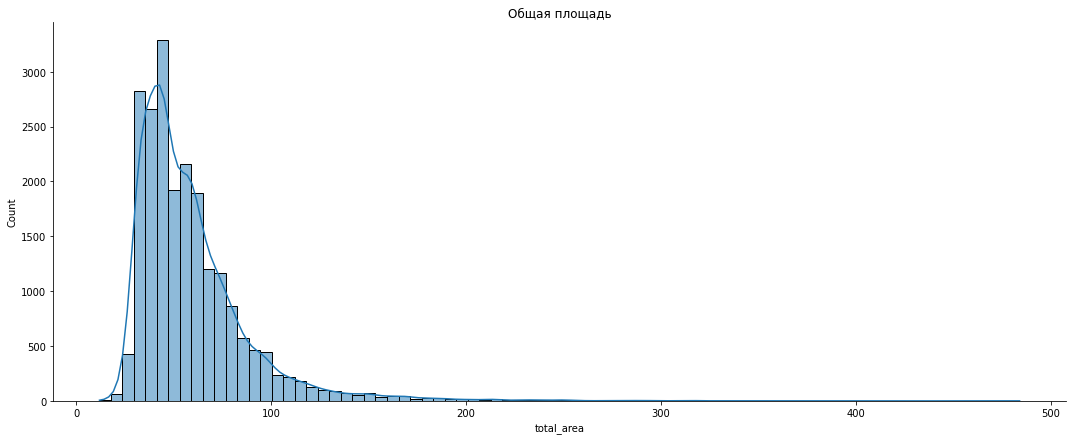

In [51]:
sns.displot(data=data, x='total_area', kde=True, bins = 80, height= 6 , aspect= 2.5);
plt.title('Общая площадь');

In [52]:
data['total_area'].median()

52.0

In [53]:
data['total_area'].max()

483.9

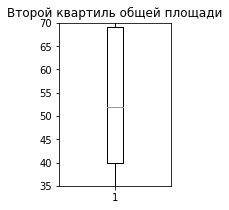

In [54]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['total_area'])
plt.ylim(35, 70)
plt.title('Второй квартиль общей площади');
pass

Столбец с общей площаью имеет несимметричное распределение. Пик - медианное значение на площади 52кв.м - самая распространенная площадь квартир. Большая часть квартир площадью - 40-70кв.м. Распределение правостороннее: достаточно много квартир площадью 12-40 кв.м. и большой разброс немногочисленных квартир с площадью 200-480 кв.м, создающих длинный хвост. 

30.0

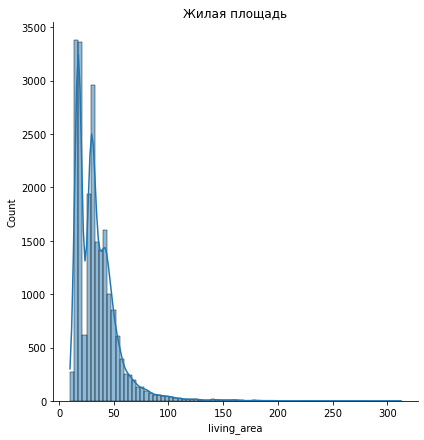

In [55]:
sns.displot(data=data, x='living_area', bins=80, height= 6, kde=True)
plt.title('Жилая площадь');
data['living_area'].median()

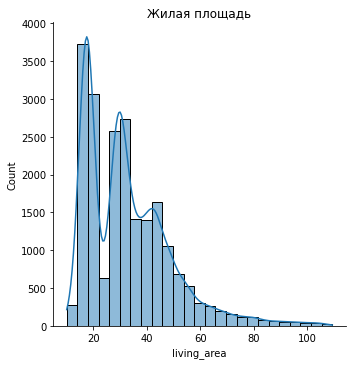

In [56]:
living = data.query('living_area<110')
sns.displot(data=living, x='living_area', bins=25, height= 5, kde=True)
plt.title('Жилая площадь');

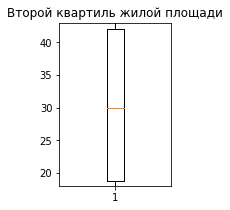

In [57]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['living_area'])
plt.title('Второй квартиль жилой площади');
plt.ylim(18, 43)
pass

Столбец с жилой площаью имеет три пиковых значения: 18, 30 (медиана) и 43 кв.м. Большой разброс немногочисленных квартир с жилой площадью до 150 кв.м, создающих длинный хвост.

100.7

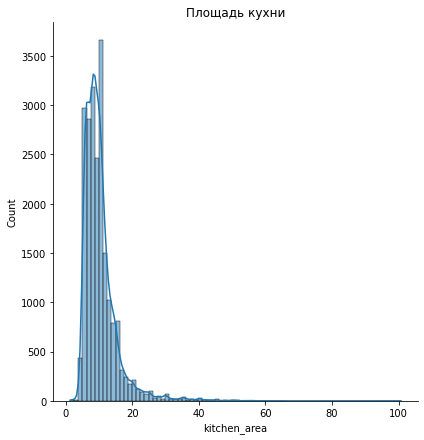

In [58]:
sns.displot(data=data, x='kitchen_area', bins=80, height= 6, kde=True)
plt.title('Площадь кухни');
data['kitchen_area'].max()

In [59]:
data['kitchen_area'].median()

9.0

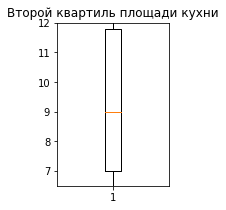

In [60]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['kitchen_area'])
plt.ylim(6.5, 12)
plt.title('Второй квартиль площади кухни');
pass

Распространенные значения площади кухни 7-12 кв.м., медиана - 9 кв.м.

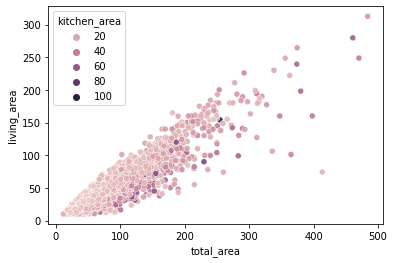

In [61]:
sns.scatterplot(data=data, x='total_area', y='living_area',hue='kitchen_area',  alpha=0.9);

Столбцы  total_area, living_area, kitchen area имеют логичную корреляцию.

#### Столбец last_price

Переведу значения столбца из рублей в млн.рублей для удобства 

In [62]:
data['last_price'] = data['last_price']/1000000 

In [63]:
print('median=', data['last_price'].median())
print('min=', data['last_price'].min())
print('max=', data['last_price'].max())
print('mode=', data['last_price'].mode())

median= 4.65
min= 0.43
max= 49.9689
mode= 0    4.5
dtype: float64


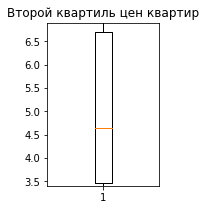

In [64]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['last_price'])
plt.ylim(3.4, 6.9)
plt.title('Второй квартиль цен квартир');
pass

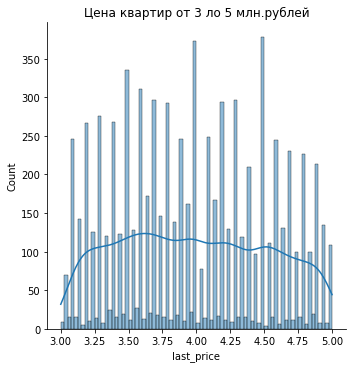

In [65]:
price = data.query('last_price>3 & last_price<5')
sns.displot(data=price, x='last_price', bins=80, height=5, kde=True)
plt.title('Цена квартир от 3 ло 5 млн.рублей');
#price['last_price'].value_counts()

In [66]:
price_45 = data.query('last_price == 4.5')
print('среднее total_area на квартиры за 4,5млн рублей = ', price_45['total_area'].median());
print('среднее rooms на квартиры за 4,5млн рублей = ', price_45['rooms'].median())
print('')
price_40 = data.query('last_price == 4')
print('cреднее total_area на квартиры за 4 млн рублей = ', price_40['total_area'].median())
print('среднее rooms на квартиры за 4 млн рублей = ', price_40['rooms'].median())
print('')
price_35 = data.query('last_price == 3.5')
print('среднее total_area на квартиры за 3,5млн рублей = ', price_35['total_area'].median())
print('среднее rooms на квартиры за 3,5млн рублей = ', price_35['rooms'].median())

среднее total_area на квартиры за 4,5млн рублей =  46.6
среднее rooms на квартиры за 4,5млн рублей =  2.0

cреднее total_area на квартиры за 4 млн рублей =  45.0
среднее rooms на квартиры за 4 млн рублей =  2.0

среднее total_area на квартиры за 3,5млн рублей =  41.0
среднее rooms на квартиры за 3,5млн рублей =  1.0


Cтоимость квартир варируется от 430тыс.руб. до 49,9 млн.руб. Самый частый встречаемый диапазон цен на квартир - примерно 3,5-7 млн.рублей. Самые распространенные цены за квартиру: на двухкомнатную 45-46кв.м. - 4 и 4,5 млн.руб., за однокомнатную 41кв.м. 3.5 млн.рублей

#### Столбец rooms

median= 2.0
min= 0
max= 19
mode= 0    1
dtype: int64


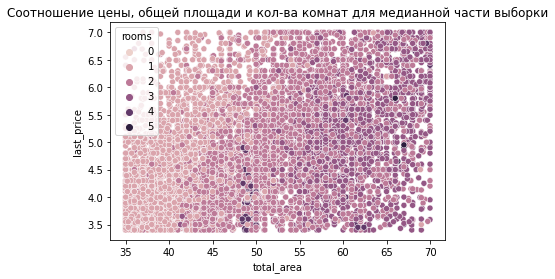

In [67]:
print('median=', data['rooms'].median())
print('min=', data['rooms'].min())
print('max=', data['rooms'].max())
print('mode=', data['rooms'].mode())
median = data.query('last_price>=3.4 & last_price<=7.0 & total_area>=35 & total_area<= 70')
sns.scatterplot(data=median, x='total_area', y='last_price',hue='rooms',  alpha=1);
plt.title('Соотношение цены, общей площади и кол-ва комнат для медианной части выборки');

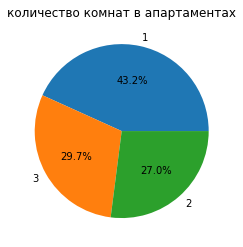

In [68]:
rooms_ap = data[data['is_apartment'] == 1]['rooms'].value_counts() #кол-во комнат в апартаментах 
plt.pie(rooms_ap, labels=rooms_ap.index, autopct='%.1f%%');
plt.title('количество комнат в апартаментах');

In [69]:
data[data['studio'] == 1]['rooms'].value_counts() #кол-во комнат в студии 

0    54
1     5
Name: rooms, dtype: int64

In [70]:
data[data['open_plan'] == 1]['rooms'].value_counts() #кол-во комнат в студии 

0    54
Name: rooms, dtype: int64

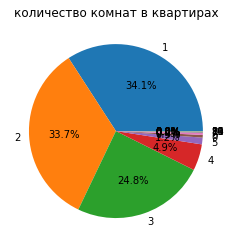

In [71]:
rooms = data['rooms'].value_counts() #кол-во комнат в квартирах
plt.pie(rooms, labels=rooms.index, autopct='%.1f%%');
plt.title('количество комнат в квартирах');

В основном, в таблице представлены однокомнатные (34,1%) и двухкомнатные квартиры (33,7%), реже трехкмонатные (24.8%) и четырехкомнатные (4.9%). В студиях и в квартирах со свободной планировкой 0 комнат. Максимальное количество комнат в квартире: 19. Апартаменты встречаются однокомнатные (43,2%), двухкомнатные(37%) и трехкомнатные(29,7%), и есть одни пятикомнатные.

Квартиры площадью до 40кв.м, в основном, однокомнатные. 40-50 кв.м. - двухкомнатные. 50-60 кв.м. двух-трехкомнатные, 60-70 кв.м трехкомнатные. 

#### Столбец ceiling_height 

In [72]:
print('median=', data['ceiling_height'].median())
print('min=', data['ceiling_height'].min())
print('max=', data['ceiling_height'].max())
print('mode=', data['ceiling_height'].mode())

median= 2.65
min= 2.4
max= 5.8
mode= 0    2.65
dtype: float64


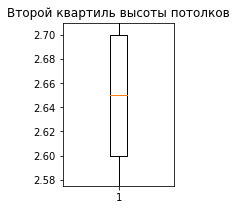

In [73]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['ceiling_height'])
plt.ylim(2.575, 2.71)
plt.title('Второй квартиль высоты потолков');
pass

Средняя высота потолков 2.65м, минимальная 2,4, максимальная 5,8 м. Средний диапазон высот: 2,6 - 2,7 м. 

#### Столбец floor

In [74]:
print('median=', data['floor'].median())
print('min=', data['floor'].min())
print('max=', data['floor'].max())
print('mode=', data['floor'].mode())

median= 4.0
min= 1
max= 33
mode= 0    2
dtype: int64


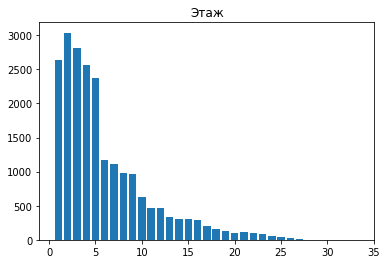

In [75]:
floor = data['floor'].value_counts()
plt.bar(floor.index, floor);
plt.title('Этаж');

In [76]:
def categorize_floor(floor):
    try:
        if 1 <= floor <= 5:
            return 'до 5 этажа'
        elif 5 < floor <= 10:
            return '5-10 этаж'
        elif 10 < floor <= 15:
            return '5-15 этаж'
        elif 15 < floor <= 20:
            return '15-20 этаж'
        elif floor >= 20:
            return 'другой'
    except:
        pass

In [77]:
total_floor_category = data['floor'].apply(categorize_floor)
total_floor_category = total_floor_category.value_counts()

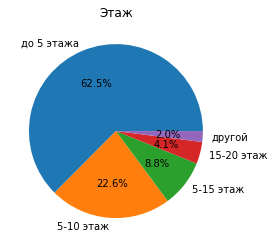

In [78]:
plt.pie(total_floor_category, labels=total_floor_category.index, autopct='%.1f%%');
plt.title('Этаж');

В основном, квартиры расплогаются до 5 этажа 62.5%, реже на 5-10 этажах 22,6%, на 5-15 этажах 8,8%. На 15-20 этажах уже только 4.1%, выше 20 этажа лишь 2% всех квартир в данных. Максимальный этаж 33. 

#### Столбец 'floor_category'

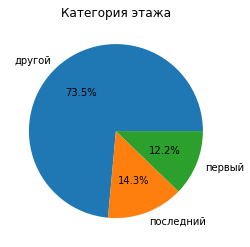

In [79]:
floor_category = data['floor_category'].value_counts()
floor_category
plt.pie(floor_category, labels=floor_category.index, autopct='%.1f%%');
plt.title('Категория этажа');

На первом этаже распологаются 12,2% квартир в данных, на последнем 14,3%, на остальных 73,5% всех квартир

#### Столбец 'floors_total'

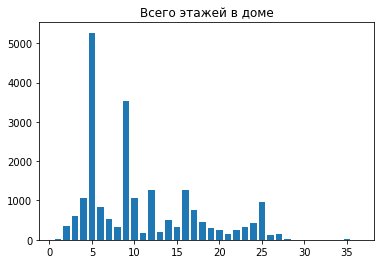

In [80]:
floors_total = data['floors_total'].value_counts()
plt.bar(floors_total.index, floors_total);
plt.title('Всего этажей в доме');

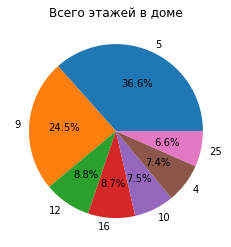

In [81]:
floors_total = data['floors_total'].value_counts().head(7)
plt.pie(floors_total, labels = floors_total.index, autopct='%.1f%%');
plt.title('Всего этажей в доме');

Большинство домов в выборке пятиэтажные и девятиэтажные

#### Столбец 'cityсenters_nearest  '

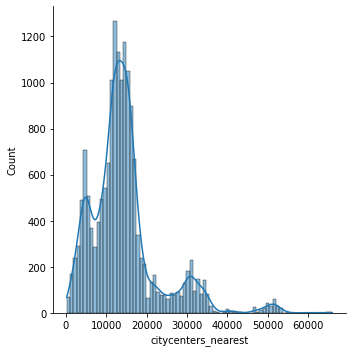

In [82]:
sns.displot(data=data, x='citycenters_nearest', bins=80, height=5, kde=True);

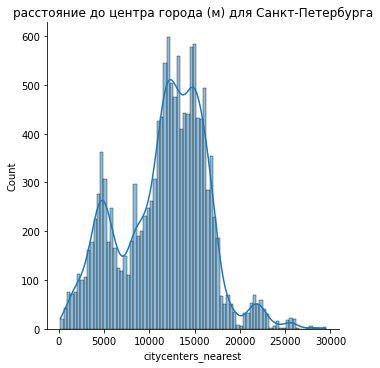

In [83]:
city_sp = data[data['locality_name'] == 'Санкт-Петербург']['citycenters_nearest']
sns.displot(data=city_sp,  bins=80, height=5, kde=True);
plt.title('расстояние до центра города (м) для Санкт-Петербурга');

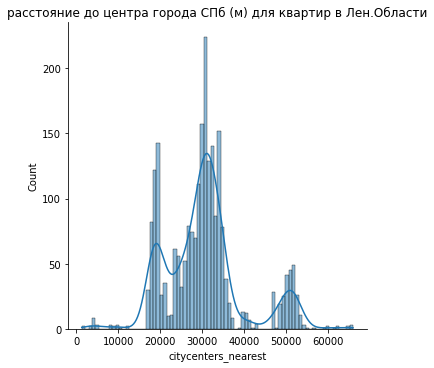

In [84]:
city_lo = data[data['locality_name'] != 'Санкт-Петербург']['citycenters_nearest']
sns.displot(data=city_lo,  bins=80, height=5, kde=True);
plt.title('расстояние до центра города СПб (м) для квартир в Лен.Области');

In [85]:
city_lo_20 = data.query('locality_name != "Санкт-Петербург" & citycenters_nearest>18000 & citycenters_nearest<20000')
city_lo_20['locality_name'].value_counts().head(3)

Парголово    196
Шушары       125
Name: locality_name, dtype: int64

In [86]:
city_lo_30 = data.query('locality_name != "Санкт-Петербург" & citycenters_nearest>25000 & citycenters_nearest<40000')
city_lo_30['locality_name'].value_counts().head(3)

Колпино    327
Пушкин     326
Шушары     171
Name: locality_name, dtype: int64

In [87]:
city_lo_50 = data.query('citycenters_nearest>48000')
city_lo_50['locality_name'].value_counts().head(3)

Ломоносов      120
Кронштадт       60
Зеленогорск     24
Name: locality_name, dtype: int64

Самые распространнные расстояния от центра города для квартир в Санкт-Петербурге - это 5км, 8км и примерно 12-18км. 
Квартиры в Ленинградской области, в основном, находятся на расстояние от центра СПб: 18-19км (Парголово, Шушары), 30-35км (Колпино, Пушкин) и 50 км - Ломоносов. 

#### Столбец 'airports_nearest'

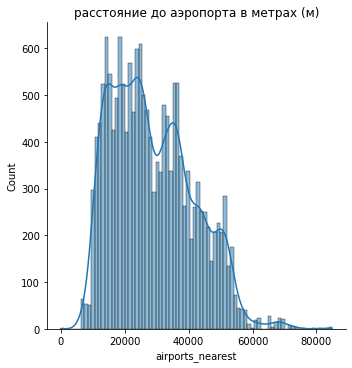

In [88]:
sns.displot(data=data, x='airports_nearest', bins=80, height=5, kde=True);
plt.title('расстояние до аэропорта в метрах (м)');

In [89]:
airport_1 = data.query('airports_nearest>15000 & airports_nearest<=30000')
airport_1['locality_name'].value_counts().head()

Санкт-Петербург    5908
Колпино             319
Шушары              212
Пушкин              203
Красное Село        156
Name: locality_name, dtype: int64

In [90]:
airport_2 = data.query('airports_nearest>30000 & airports_nearest<=40000')
airport_2['locality_name'].value_counts().head(4)

Санкт-Петербург    3654
Петергоф            128
Понтонный            12
Колпино               8
Name: locality_name, dtype: int64

In [91]:
airport_3 = data.query('airports_nearest>40000')
airport_3['locality_name'].value_counts().head(4)

Санкт-Петербург    2507
Парголово           300
Сестрорецк          167
Ломоносов           129
Name: locality_name, dtype: int64

In [92]:
a = data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].count()/(data['locality_name'].count())*100
print('Процент заполнения стролбца для Санкт-Петербурга =', a)

Процент заполнения стролбца для Санкт-Петербурга = 66.45086166744294


In [93]:
data.query("locality_name == 'Санкт-Петербург'")['airports_nearest'].max()

54784.0

Расстояния до аэропорта в столбце 'airports_nearest' в основном заполнены для Санкт-Петербурга (66.5%), для большинства квартир это примерно 15-30км, максимум 54,8км. Среди других городов в расстоянии до 30 км от аэропорта лидируют по количеству объявлений: Колпино, Шушары, Пушкин. От 30-40км - Петергоф, свыше 40км - Парголово.

#### Столбец 'parks_nearest'

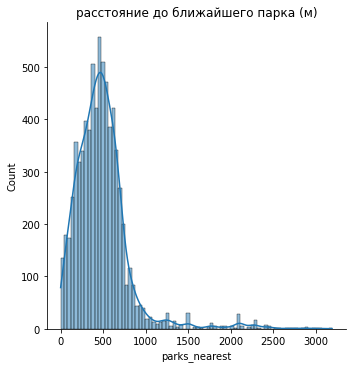

In [94]:
sns.displot(data=data, x='parks_nearest', bins=80, height=5, kde=True);
plt.title('расстояние до ближайшего парка (м)');

In [95]:
ponds = data.query('parks_nearest<1000')
ponds['locality_name'].value_counts().head()

Санкт-Петербург    6301
Пушкин              201
Петергоф            130
Колпино             115
Кронштадт            81
Name: locality_name, dtype: int64

Зачастую, в объявлениях указывают расстояние до ближайшего парка, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Пушкин, Петергоф, Колпино и Кронштадт. 

#### Столбец 'ponds_nearest'

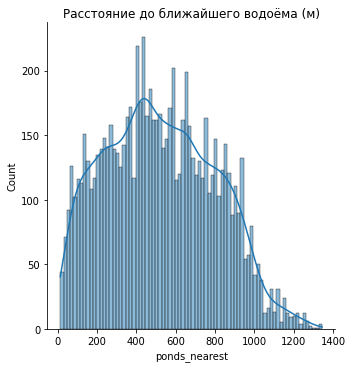

In [96]:
sns.displot(data=data, x='ponds_nearest', bins=80, height=5, kde=True);
plt.title('Расстояние до ближайшего водоёма (м)');

In [97]:
ponds = data.query('ponds_nearest<700')
ponds['locality_name'].value_counts().head()

Санкт-Петербург    5080
Колпино             135
Пушкин              132
Шушары              116
Сестрорецк          109
Name: locality_name, dtype: int64

Зачастую, в объявлениях указывают расстояние до ближайшего водоема, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Колпино, Пушкин, Шушары и Сестрорецк. 

#### День и месяц публикации объявления

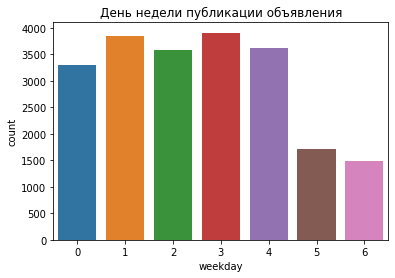

In [98]:
sns.countplot(data=data, x='weekday');
plt.title('День недели публикации объявления');

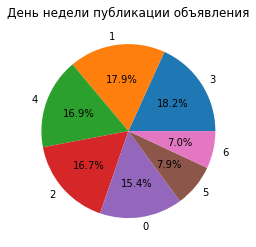

In [99]:
weekday = data['weekday'].value_counts()
plt.pie(weekday, labels = weekday.index, autopct='%.1f%%');
plt.title('День недели публикации объявления');

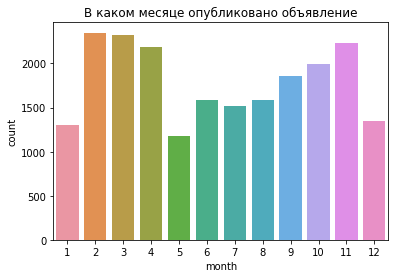

In [100]:
sns.countplot(data=data, x='month');
plt.title('В каком месяце опубликовано объявление');

In [101]:
data['month'].value_counts().head()

2     2349
3     2327
11    2229
4     2187
10    1991
Name: month, dtype: int64

Чаще всего объявления публикуют в будние дни: в четверг (18,2%), вторник (17.9%), чуть реже в среду или пятницу: 16,9% и 16,7% соответственно.

Пик публикаций объявлений приходится на февраль. Дальше активность немного падает в марте и апреле. В мае публикуются минимум объявлений, затем снова рост и в ноябре поднимается почти до отметок начала года и снова резкий спад в декабре. 
Небольшое количество объявлений в декабре и январе можно объяснить новогодними праздниками, а спад с мая по август - майскими праздниками и сезоном отпусков. 

#### Cколько дней было размещено объявление (от публикации до снятия)

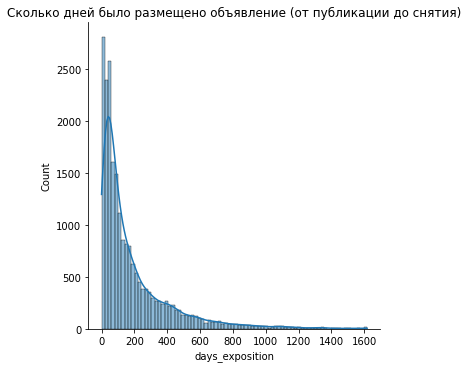

In [102]:
sns.displot(data=data, x='days_exposition', bins=80, height=5, kde=True);
plt.title('Cколько дней было размещено объявление (от публикации до снятия)');

In [103]:
print('Среднее количество дней до снятия объвления', data['days_exposition'].mean())

Среднее количество дней до снятия объвления 189.1339077782953


In [104]:
print('Медианное количество дней до снятия объвления', data['days_exposition'].median())

Медианное количество дней до снятия объвления 99.0


45    561
60    366
7     242
30    221
4     200
Name: days_exposition, dtype: int64

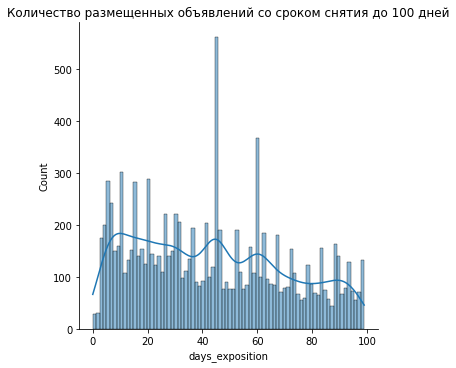

In [105]:
days_exposition_min100 = data.query('days_exposition < 100')
sns.displot(data=days_exposition_min100, x='days_exposition', bins=80, height=5, kde=True);
plt.title('Количество размещенных объявлений со сроком снятия до 100 дней');
data['days_exposition'].value_counts().head()

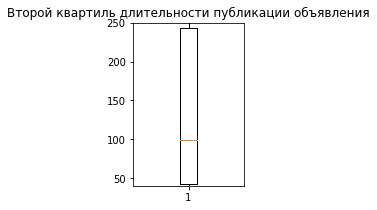

In [106]:
plt.figure(figsize=(2, 3))
plt.boxplot(data['days_exposition'])
plt.ylim(40, 250)
plt.title('Второй квартиль длительности публикации объявления');
pass

Продажа квартиры обычно занимает около 3-4 месяцев, в основном, до 60 дней. В норме до 100 дней. Быстрые продажи: до 45 дней, необычно долгие от 4 месяцев. 

#### Факторы, влияющие на общую (полную) стоимость объекта

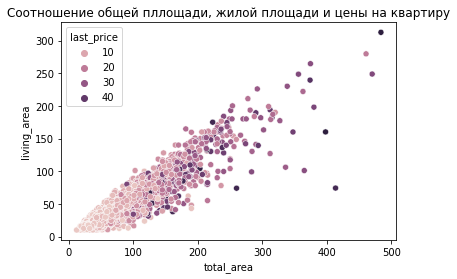

In [107]:
sns.scatterplot(data=data, x='total_area', y='living_area', hue='last_price', alpha=1)
plt.title('Cоотношение общей пллощади, жилой площади и цены на квартиру');

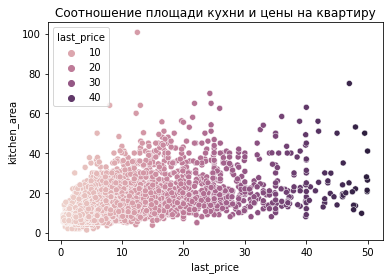

In [108]:
sns.scatterplot(data=data, x='last_price', y='kitchen_area', hue='last_price', alpha=1)
plt.title('Cоотношение площади кухни и цены на квартиру');

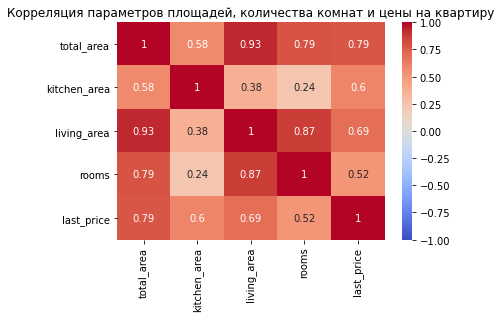

In [109]:
data_corr = data[['total_area','kitchen_area', 'living_area', 'rooms', 'last_price']].copy()
sns.heatmap(data_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.title('Корреляция параметров площадей, количества комнат и цены на квартиру');

Общая площадь и жилая площадь имеют прямую корреляцию, так что можно сказать, что это один и тот же параметр, влиияющий на стоимость квартиры. 

In [110]:
pd.pivot_table(
    data=data,
    index='floor_category',
    values='last_price',
    aggfunc='mean')

,last_price
floor_category,
другой,6.212916
первый,4.676820
последний,5.911049


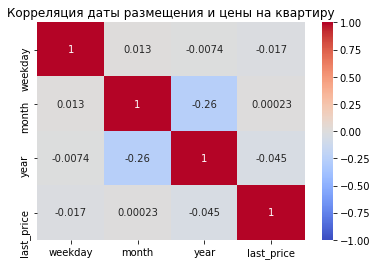

In [111]:
data_corr_day = data[['weekday','month', 'year','last_price']].copy()
sns.heatmap(data_corr_day.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.title('Корреляция даты размещения и цены на квартиру');

In [112]:
pd.pivot_table(
    data=data,
    index='weekday',
    values='last_price',
    aggfunc={'mean','count'}).sort_values('mean', ascending=False)

,count,mean
weekday,,
3,3910,6.187779
0,3304,6.070121
2,3592,6.028920
1,3841,5.989026
6,1494,5.886399
4,3624,5.777555
5,1705,5.748537


In [113]:
pd.pivot_table(
    data=data,
    index='year',
    values='last_price',
    aggfunc={'mean','count'}).sort_values('mean', ascending=False)

,count,mean
year,,
2014,127,10.567255
2015,1097,7.112462
2019,2649,6.231654
2016,2623,6.019239
2017,7553,5.896169
2018,7421,5.722778


In [114]:
pd.pivot_table(
    data=data,
    index='year',
    values='total_area',
    aggfunc={'mean', 'count'}).sort_values('mean', ascending=False)

,count,mean
year,,
2014,127,81.385276
2015,1097,68.595597
2016,2623,60.707480
2017,7553,59.326766
2019,2649,57.809607
2018,7421,57.194397


In [115]:
price_per_sqm_year = pd.pivot_table(
   data=data,
   index='year',
   values='price_per_sqm',
   aggfunc={'mean'}).sort_values('year')
price_per_sqm_year

,mean
year,
2014,119.942807
2015,98.885024
2016,95.429958
2017,95.494176
2018,97.367630
2019,104.517559


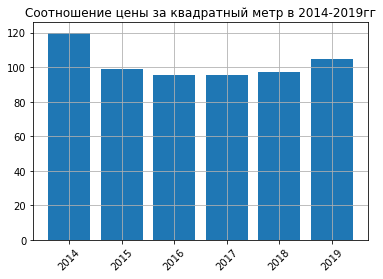

In [116]:
my_series = price_per_sqm_year.squeeze()
my_series
plt.bar(my_series.index, my_series)
plt.title('Соотношение цены за квадратный метр в 2014-2019гг');
plt.grid()
plt.xticks(rotation=45)
plt.show()

Больше всего на цену влияет общая площадь квартиры, корреляция составляет 0,79. Площадь кухни никак не влият на конечную стоимость. 

День недели выбранный для публикации объявления может повлиять на стоимость квартиры на 0,07%, выше всего стоимость в среду. 

В период с 2014-2018 год стоимость квартир на продажу снизилось примерно на 54%, но общая площадь квартир на рынке также уменьшилось на 70%. Скачки цен за кв.м. за этот период не повлиял на показатели.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [117]:
locality_name_max10 = pd.pivot_table(
   data=data,
   index=('locality_name'),
   values='price_per_sqm',
   aggfunc={'mean','count'}).sort_values('count', ascending=False).head(10)
locality_name_max10 = locality_name_max10['mean'].sort_values(ascending=False)
locality_name_max10

locality_name
Санкт-Петербург    111.485964
Пушкин             103.428484
Кудрово             95.461482
Парголово           90.549618
Мурино              86.220081
Петергоф            84.480970
Шушары              78.470324
Колпино             75.344096
Всеволожск          68.936434
Гатчина             68.639082
Name: mean, dtype: float64

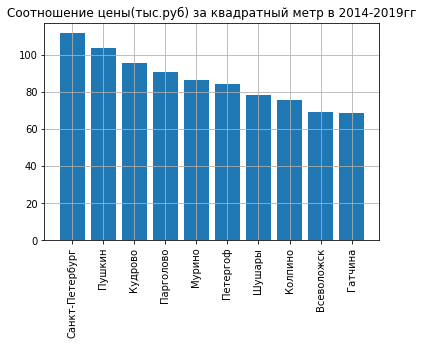

In [118]:
plt.bar(locality_name_max10.index, locality_name_max10)
plt.title('Соотношение цены(тыс.руб) за квадратный метр в 2014-2019гг');
plt.grid()
plt.xticks(rotation=90)
plt.show()

Самая высокая цена за квадратный метр в Санкт-Петербурге (111.49тыс.руб/кв.м), самая низкая в Гатчине (68.64тыс.руб/кв.м)

#### Средняя цена за километр 

In [120]:
citycenter_km_price = pd.pivot_table(
   data=data,
   index=('citycenter_km'),
   #values='price_per_sqm',
   aggfunc={'price_per_sqm': np.median})

citycenter_km_price = citycenter_km_price['price_per_sqm']
citycenter_km_price = citycenter_km_price.head(30)
citycenter_km_price

citycenter_km
0.0     144.957983
1.0     124.145394
2.0     118.867925
3.0     106.801051
4.0     115.288462
5.0     125.000000
6.0     124.529429
7.0     123.509418
8.0     121.082781
9.0     105.423179
10.0    106.250000
11.0    103.552582
12.0    103.878116
13.0    104.081633
14.0    101.391656
15.0    101.286174
16.0     97.222222
17.0     94.378698
18.0     91.749219
19.0     97.509945
20.0     92.237563
21.0     82.899939
22.0     85.690476
23.0     88.025897
24.0     75.893177
25.0     93.910130
26.0     92.996003
27.0     98.437500
28.0     77.119510
29.0     73.949323
Name: price_per_sqm, dtype: float64

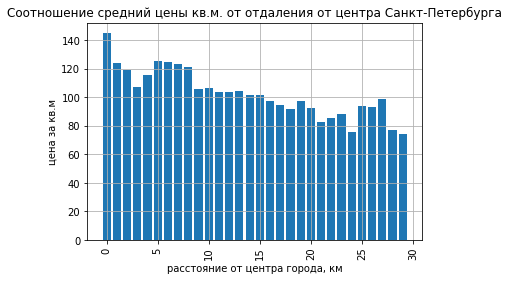

In [121]:
plt.bar(citycenter_km_price.index, citycenter_km_price)
plt.xlabel('расстояние от центра города, км')
plt.ylabel('цена за кв.м')
plt.title('Соотношение средний цены кв.м. от отдаления от центра Санкт-Петербурга');
plt.grid()
plt.xticks(rotation=90)
plt.show()

Цены на объекты недвижимости в среднем имеют тенденцию к спаду по мере увеличения расстояния от центра Санкт-Петербурга, но все же график представляет из себя скорее волнообразную кривую с пиковыми значениями на 5, 19 и 27 км отдаления от центра. Предположу, что на данных расстояниях находятся новые комфортные жилые комплексы высокой ценновой категории.  

#### Вывод 

- Самая распространенная общая площадь квартир: 52кв.м. Большая часть квартир в объявлениях с общей площадью - 40-70кв.м. 

- Самый распространненые значения жилой площади в квартирах: 18, 30 (медиана) и 43 кв.м.

- Средний диапазон цен на квартиры - примерно 3,5-7 млн.рублей. В основном: двухкомнатные 45-46кв.м.

- 4 и 4,5 млн.руб., однокомнатные 41кв.м. 3.5 млн.рублей

- По большей части, в данных представлены однокомнатные (34,1%) и двухкомнатные квартиры (33,7%), реже трехкмонатные (24.8%) и четырехкомнатные (4.9%). Апартаменты встречаются однокомнатные (43,2%), двухкомнатные(37%) и трехкомнатные(29,7%).

- Средняя высота потолков 2.65м, минимальная 2,4, максимальная 5,8 м. Средний диапазон высот: 2,6 - 2,7 м.

- В основном, квартиры расплогаются до 5 этажа 62.5%, реже на 5-10 этажах 22,6%, на 5-15 этажах 8,8%. На 15-20 этажах уже только 4.1%, выше 20 этажа лишь 2% всех квартир в данных. 

- На первом этаже распологаются 12,2% квартир в данных, на последнем 14,3%, на остальных 73,5% всех квартир.

- Большинство домов в выборке пятиэтажные и девятиэтажные.

- Самые распространнные расстояния от центра города для квартир в Санкт-Петербурге - это 5км, 8км и примерно 12-18км. Квартиры в Ленинградской области, в основном, находятся на расстояние от центра СПб: 18-19км (Парголово, Шушары), 30-35км (Колпино, Пушкин) и 50 км (Ломоносов). 

- Расстояния до аэропорта, в основном, заполнены в объявлениях квартир Санкт-Петербурга (66.5%), в среднем это примерно 15-30км, максимум 54,8км. Среди других городов в расстоянии до 30 км от аэропорта лидируют по количеству объявлений: Колпино, Шушары, Пушкин. От 30-40км - Петергоф, свыше 40км - Парголово.

- Зачастую, в объявлениях указывают расстояние до ближайшего парка, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Пушкин, Петергоф, Колпино и Кронштадт.

- В основном, в объявлениях указывают расстояние до ближайшего водоема, когда это расстояние до 1км. Чаще всего это 400-700м, в таких локациях как: Санкт-Петербург, Колпино, Пушкин, Шушары и Сестрорецк.
- Продажа квартиры обычно занимает около 3-4 месяцев, чаще до 60 дней. В норме до 100 дней. Быстрые продажи: до 45 дней, необычно долгие от 4 месяцев.

- Чаще всего объявления публикуют в будние дни: в четверг (18,2%), вторник (17.9%), чуть реже в среду или пятницу: 16,9% и 16,7% соответственно. Пик публикаций объявлений приходится на февраль. В мае публикуются минимум объявлений, затем снова рост, и в ноябре поднимается почти до отметок начала года и снова резкий спад в декабре. Небольшое количество объявлений в декабре и январе можно объяснить новогодними праздниками, а спад с мая по август - майскими праздниками и сезоном отпусков.

- Больше всего на цену влияет общая площадь квартиры, корреляция составляет 0,79. Площадь кухни никак не влият на конечную стоимость. День недели выбранный для публикации объявления может повлиять на стоимость квартиры на 0,07%, выше всего стоимость в среду. В период с 2014-2018 год стоимость квартир на продажу снизилось примерно на 54%, но общая площадь квартир на рынке также уменьшилось на 70%. Скачки цен за кв.м. за этот период не повлиял на показатели. 

- Самая высокая цена за квадратный метр в Санкт-Петербурге (111.49тыс.руб/кв.м), самая низкая в Гатчине (68.64тыс.руб/кв.м) в период с 2014-2018 гг.

- Цены на объекты недвижимости имеют тенденцию к спаду по мере увеличения расстояния от центра Санкт-Петербурга до тех пор, пока размах отдаления не пересекает другие достаточно крупные города Ленинградской области: Пушкин, Сестрорецк и Зеленогорск, хорошо подходящие для дорогостоящего пригородного жилья. 

### Общий вывод

1. - Такие параметры как: число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, число водоёмов в радиусе 3 км - нет возможности рассмотреть для анализа стоимости квартиры, так как заполненных данных слишком мало. Эти параметры можно автоматизировать, алгоритм можем сам вычислять расоложение рядом водоемов и парковых зон вблизи адреса объекта. Аналогично можно поступить с такими параметрами как: расстояние до ближайшего аэропорта, расстояние до центра города.
   - в столбце с числом балконов слишком много аномальных значений, поэтому данный параметр также не поддается анализу. 
   - в столбце с высотой потолков было много аномально маленьких значений, можно сделать минимальную границы для заполнения данного столбца
   - в столбце с названием населенного пункта слишком много неявных дубликатов. В этот параметр можно добавить функцию автоматического ввода данных. 

2. - Для анализа данных были посчитаны и добавленны такие дополнительные параметры, как: цена одного квадратного метра, день, месяц, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние в км до центра города.

3. - Больше всего предложений на квартиры с общей площадью в диапозоне: 40-70кв.м., с жилой: 18-43 кв.м. В среднем: 52кв.м. и 30кв.мм, соответсвенно. 

   - Средний диапазон цен на квартиры - примерно 3,5-7 млн.рублей. В основном: однокомнатные 41кв.м. стоимостью 3.5 млн.рублей, двухкомнатные 45-46кв.м., стоимостью 4-4,5 млн.руб.

   - По большей части, в данных представлены однокомнатные (34,1%) и двухкомнатные квартиры (33,7%), реже трехкмонатные (24.8%) и четырехкомнатные (4.9%). Апартаменты встречаются однокомнатные (43,2%), двухкомнатные(37%) и трехкомнатные(29,7%).

   - Средняя высота потолков 2.65м, средний диапазон высот: 2,6 - 2,7 м.

   - В основном, квартиры расплогаются до 5 этажа: 62.5%; реже на 5-10 этажах: 22,6%; выше 5  этажа остальные 14,9%. При этом на первом этаже распологаются 12,2% квартир в данных, на последнем 14,3%, на остальных 73,5% всех квартир.Большинство домов в выборке пятиэтажные и девятиэтажные: 36,6% и 24,5%, соответственно.
   
   - Самые распространнные расстояния от центра города для квартир в Санкт-Петербурге - это 5км, 8км и примерно 12-18км. Квартиры в Ленинградской области, в основном, находятся на расстояние от центра СПб: 18-19км (Парголово, Шушары), 30-35км (Колпино, Пушкин) и 50 км (Ломоносов). 

   - Расстояния до аэропорта, в основном, заполнены в объявлениях квартир Санкт-Петербурга (66.5%), в среднем это примерно 15-30км, максимум 54,8км. Среди других городов в расстоянии до 30 км от аэропорта лидируют по количеству объявлений: Колпино, Шушары, Пушкин. От 30-40км - Петергоф, свыше 40км - Парголово.

   - Зачастую, в объявлениях указывают расстояние до ближайшего парка или водоема, когда это расстояние до 1км. Чаще всего это 400-700м, наличие парка указывают чаще в таких локациях как: Санкт-Петербург, Пушкин, Петергоф, Колпино и Кронштадт. Наличие водоема: Санкт-Петербург, Колпино, Пушкин, Шушары и Сестрорецк.
   
   - Продажа квартиры обычно занимает около 3-4 месяцев, чаще до 60 дней. В норме до 100 дней. Быстрые продажи: до 45 дней, необычно долгие от 4 месяцев. Чаще всего объявления публикуют в будние дни: в четверг (18,2%), вторник (17.9%), чуть реже в среду или пятницу: 16,9% и 16,7%, соответственно. Максимум публикаций объявлений приходится на февраль и ноябрь. Небольшое количество объявлений в декабре и январе можно объяснить новогодними праздниками, а спад с мая по август - майскими праздниками и сезоном отпусков.

   - Больше всего на цену влияет общая площадь квартиры, корреляция составляет 0,79. День недели выбранный для публикации объявления может повлиять на стоимость квартиры на 0,07%, выше всего стоимость в среду. В период с 2014-2018 год стоимость квартир на продажу снизилось примерно на 54%, но общая площадь квартир на рынке также уменьшилось на 70%, т.е. выросло предложение на 1-2комнатные квартиры. 

   - Самая высокая цена за квадратный метр в Санкт-Петербурге (111.49тыс.руб/кв.м), самая низкая в Гатчине (68.64тыс.руб/кв.м) в период с 2014-2018 гг.

   - Цены на объекты недвижимости имеют тенденцию к спаду по мере увеличения расстояния от центра Санкт-Петербурга до тех пор, пока размах отдаления не пересекает другие достаточно крупные города Ленинградской области: Пушкин, Сестрорецк и Зеленогорск. 